# 시각화 기법

## X축 tick label 다루기

시계열 그래프는 x축 시간을 설정 > 변화하는 변수를 설정하는 차트

- 시계열 그래프의 x축 라벨 설정
- 데이터셋 : ABNB_stock.csv 

In [2]:
import seaborn as sns
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt

In [3]:
df_abnb = pd.read_csv(
    './data/ABNB_stock.csv'
)
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


# lineplot (sns)

<Axes: xlabel='Date', ylabel='Close'>

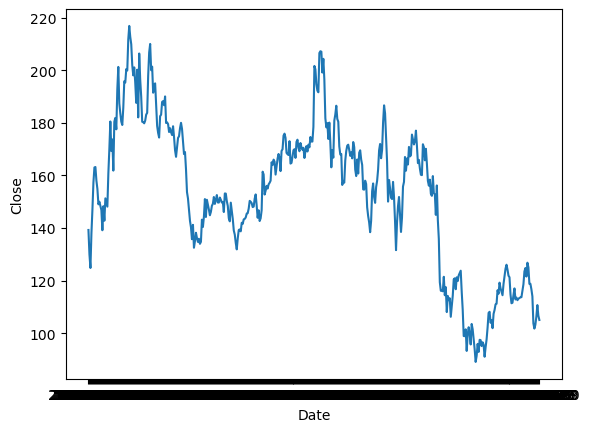

In [4]:
# x축이 이상함
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)

x축이 겹쳐서 안보인다. 문제 있음

In [5]:
df_abnb['Date']

0      2020-12-11
1      2020-12-14
2      2020-12-15
3      2020-12-16
4      2020-12-17
          ...    
449    2022-09-26
450    2022-09-27
451    2022-09-28
452    2022-09-29
453    2022-09-30
Name: Date, Length: 454, dtype: object

In [6]:
# Date(object) type을 datetime type으로 변환
df_abnb['Date'] = pd.to_datetime(df_abnb['Date'])
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       454 non-null    datetime64[ns]
 1   Open       454 non-null    float64       
 2   High       454 non-null    float64       
 3   Low        454 non-null    float64       
 4   Close      454 non-null    float64       
 5   Adj Close  454 non-null    float64       
 6   Volume     454 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 25.0 KB


(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

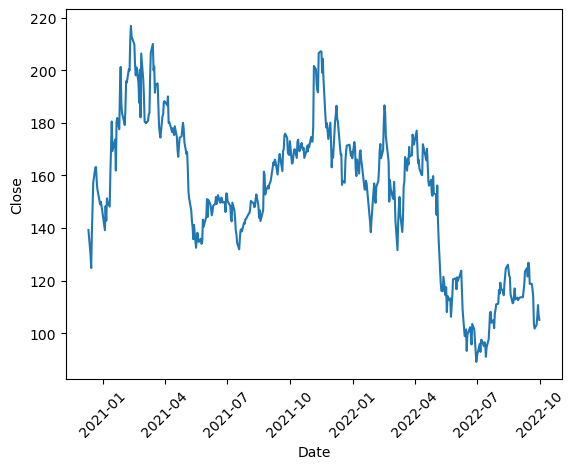

In [7]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax, )
plt.xticks(rotation=45)

# 축 라벨 회전, 표현 방식을 변경 > fomatter를 변경

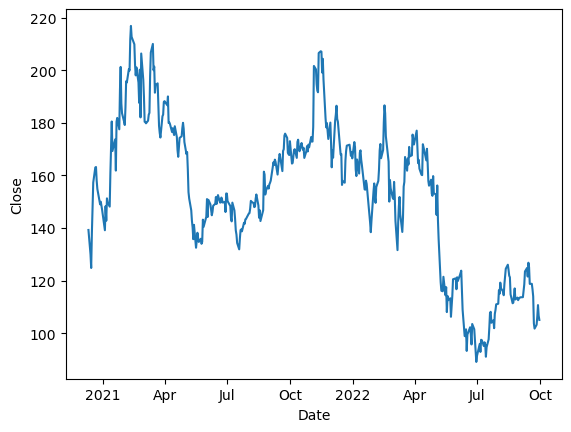

In [8]:
# x축 년, 월로 변경
import matplotlib as mpl

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# plotly line

In [9]:
# plotly line
# x축이 자동으로 월-년 형식으로 나온다
px.line(data_frame=df_abnb, x='Date', y='Close', width=600, height=400)

In [10]:
# x축을 년-월-일 형식으로 변경
fig = px.line(data_frame=df_abnb, x='Date', y='Close', width=600, height=400)
fig.update_xaxes(tickformat = '%Y-%m-%d')

# 다중 축 차트

기본 차트 x, y + y1, y2 -> 하나의 ax에 그리기

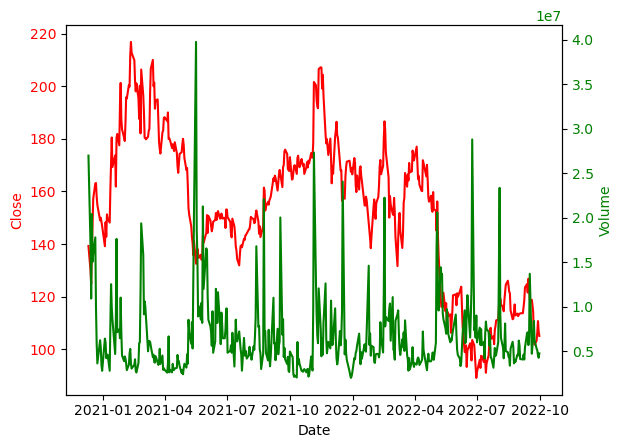

In [11]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(data=df_abnb, x='Date', y='Close', ax=ax, color='red')
sns.lineplot(data=df_abnb, x='Date', y='Volume', ax=ax2, color= 'green')

#왼쪽y축 정보 설정
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red') 
#오른쪽y축
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.label.set_color('green')

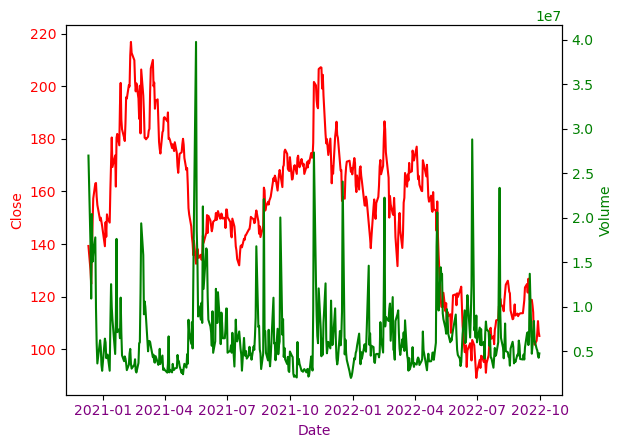

In [12]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(data=df_abnb, x='Date', y='Close', ax=ax, color='red')
sns.lineplot(data=df_abnb, x='Date', y='Volume', ax=ax2, color= 'green')

# 왼쪽 y축
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')
# 오른쪽 y축 
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.label.set_color('green')

# x축
ax.tick_params(axis='x', labelcolor='purple')
ax.xaxis.label.set_color('purple')

# x축 날짜 포맷 지정하기

In [13]:
df_abnb.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [14]:
# 3개 축 
# 최고가 - 최저가 = High_Low 변수 추가
df_abnb['High_Low'] = df_abnb['High'] = df_abnb['Low']
df_abnb.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,High_Low
0,2020-12-11,146.550003,135.100006,135.100006,139.250000,139.250000,26980800,135.100006
1,2020-12-14,135.000000,125.160004,125.160004,130.000000,130.000000,16966100,125.160004
2,2020-12-15,126.690002,121.500000,121.500000,124.800003,124.800003,10914400,121.500000
3,2020-12-16,125.830002,124.910004,124.910004,137.990005,137.990005,20409600,124.910004
4,2020-12-17,143.000000,142.669998,142.669998,147.050003,147.050003,15054700,142.669998


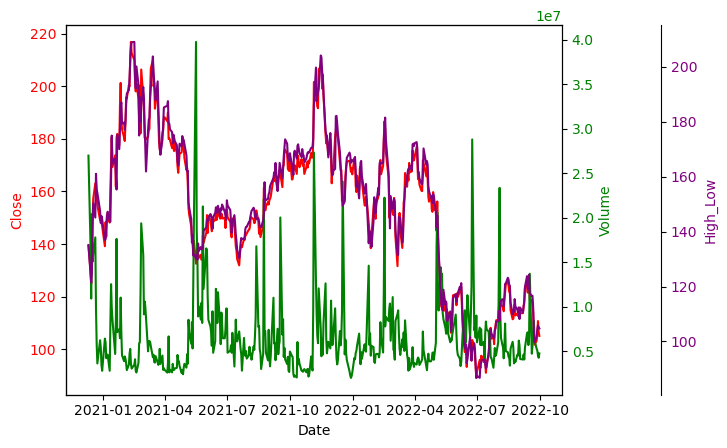

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()

ax3.spines.right.set_position(('axes', 1.2)) # 현재축 위치에서 0.2 만큼 오른쪽으로 이동
sns.lineplot(data=df_abnb, x='Date', y='Close', ax=ax, color='red')
sns.lineplot(data=df_abnb, x='Date', y='Volume', ax=ax2, color= 'green')
sns.lineplot(data=df_abnb, x='Date', y='High_Low', ax=ax3, color='purple')


# 왼쪽 y축
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')
# 오른쪽 y축 
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.label.set_color('green')

# 오른쪽 2번째 y축
ax3.tick_params(axis='y', labelcolor='purple')
ax3.yaxis.label.set_color('purple')

# x축
ax.tick_params(axis='x', labelcolor='black')
ax.xaxis.label.set_color('black')

In [ ]:
# plotly로 2중축 차트
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y":True}]]) # 2dimesion list로 spec 지정

# 축 설정
sub_fig_1 = px.line(df_abnb, x='Date', y='Close')
sub_fig_1.update_traces(line_color='red')
sub_fig_2 = px.line(df_abnb, x='Date', y='Volume')
sub_fig_2.update_traces(line_color='green')
sub_fig_2.update_traces(yaxis='y2')

# 2개의 축 더하기
fig.add_traces(sub_fig_1.data + sub_fig_2.data)

# 레이블 설정
fig.layout.xaxis.title = 'Date'
fig.layout.xaxis.title = 'Close'
fig.layout.yaxis.color ='red'
fig.layout.yaxis2.title ='Volume'
fig.layout.yaxis2.color ='blue'

fig.update_layout(width=800, height=400)

# plotly.graph_object 로 그리기
# plotly.express 로 그리기

In [77]:
# plotly.graph_object
# 3개 축 그리기

import plotly.graph_objects as go

fig = make_subplots()
fig.add_traces(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Close'], name='Close',
        mode = 'lines', yaxis='y', line={'color':'red'}
        ) # 1번째 축
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Volume'], name='Volume',
        mode = 'lines', yaxis='y2', line={'color':'blue'}
        ) # 2번째 축 Volume
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['High_Low'], name='High-Low',
        mode = 'lines', yaxis='y3', line={'color':'green'}
        ) # 3번째 축 High-Low
)
fig.update_layout(
    yaxis = dict(title='Close'),
    yaxis2 = dict(title='Volume', position=1, side='right', overlaying='y', anchor='free'),
    yaxis3 = dict(title='High-Low', side='right', anchor='x', overlaying='y'),
    xaxis = dict(title='Date', domain=[.1, .85]),
    width=600, height=400
)

fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()

# 범례 위치 조정하기

In [78]:
# plotly.graph_object
# 3개 축 그리기

import plotly.graph_objects as go

fig = make_subplots()
fig.add_traces(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Close'], name='Close',
        mode = 'lines', yaxis='y', line={'color':'red'}
        ) # 1번째 축
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Volume'], name='Volume',
        mode = 'lines', yaxis='y2', line={'color':'blue'}
        ) # 2번째 축 Volume
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['High_Low'], name='High-Low',
        mode = 'lines', yaxis='y3', line={'color':'green'}
        ) # 3번째 축 High-Low
)
fig.update_layout(
    yaxis = dict(title='Close'),
    yaxis2 = dict(title='Volume', position=1, side='right', overlaying='y', anchor='free'),
    yaxis3 = dict(title='High-Low', side='right', anchor='x', overlaying='y'),
    xaxis = dict(title='Date', domain=[.1, .85]),
    width=800, height=400,
    legend=dict(
        x=1.2,   # x 좌표 (0=왼쪽, 1=오른쪽)
        y=1,      # y 좌표 (0=아래, 1=위)
        xanchor="left",  # 범례 박스의 기준(anchor)을 왼쪽에 맞춤
        yanchor="top"    # 위쪽에 맞춤
    )
)

fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()

In [18]:
df_co2 = pd.read_csv(
    './data/CO2_Emissions.csv'
)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [19]:
df_co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


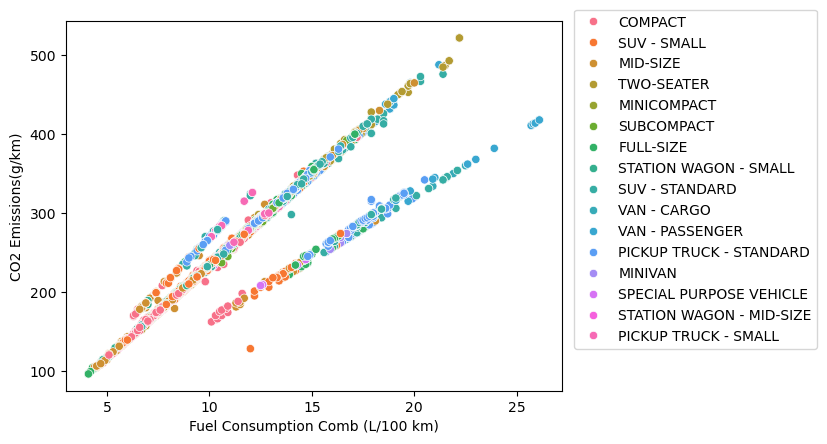

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(
    data=df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Vehicle Class',
    ax=ax
)
ax.legend(bbox_to_anchor=(1.01, 1.05)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

In [21]:
# plotly scatter

fig = px.scatter(
    df_co2, 
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    color='Vehicle Class',  # 이 부분을 추가하면 범례가 생깁니다.
    width=900,
    height=600
)
# 범례
fig.update_layout(legend_x=1.2, legend_y=1)

fig.show() # Plotly는 .show()로 차트를 표시합니다.

# 강조하기
테두리 색, 굵기 조정

In [22]:
df_co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

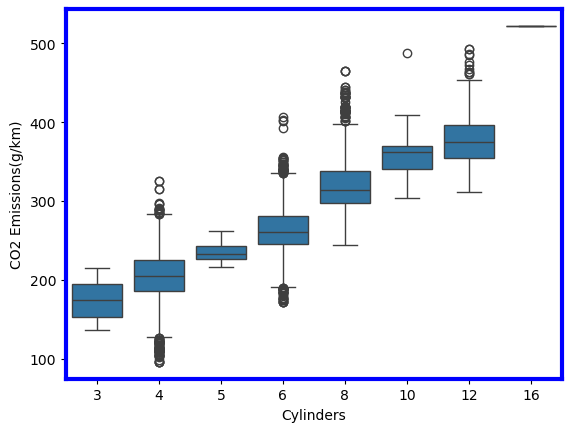

In [23]:
fig, ax = plt.subplots()

sns.boxplot(
    data=df_co2, x='Cylinders', y='CO2 Emissions(g/km)'
)
spines = ['left','right','top','bottom']
for spin in spines:
    ax.spines[spin].set_color('blue')
    ax.spines[spin].set_linewidth(3)

In [24]:
# plotyl 테두리 강조하기
fig = px.box(data_frame=df_co2, x='Cylinders', y='CO2 Emissions(g/km)')
fig.update_xaxes(
    showline=True ,
    linecolor='black',
    linewidth=2,
    mirror=True
)
fig.update_yaxes(
    showline=True,
    linecolor='black',
    linewidth=2,
    mirror=True
)
fig.show()

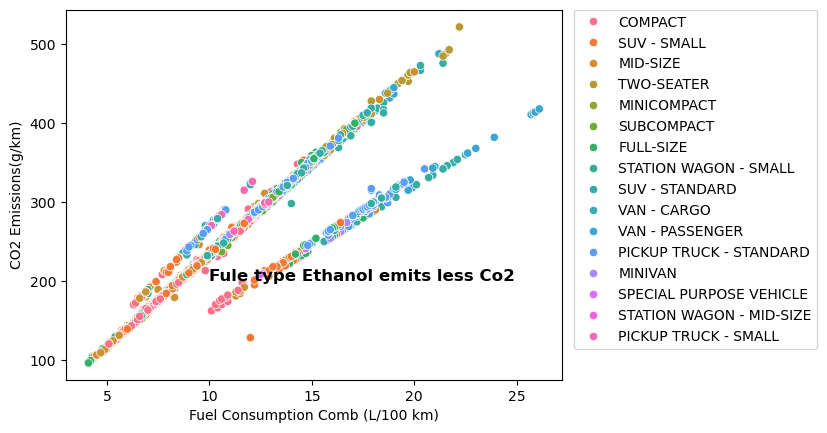

In [25]:
# 절대좌표
# 텍스트로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    data=df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Vehicle Class',
    ax=ax
)

ax.legend(bbox_to_anchor=(1.01, 1.05)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

ax.text(
    x=10, y=200, # 내가 지정한 위치 (절대좌표)
    s='Fule type Ethanol emits less Co2',
    fontdict={'fontsize':12, 'weight':'bold'},
)
ax.legend(bbox_to_anchor=(1.01, 1.02))

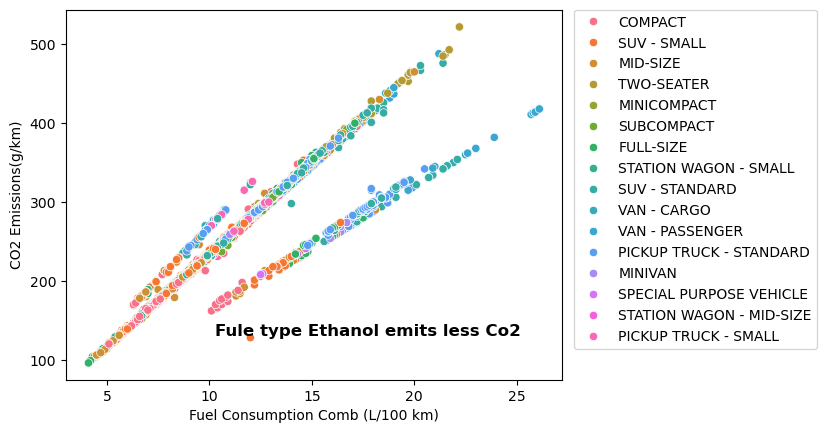

In [ ]:
# 상대좌표
# 텍스트로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    data=df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Vehicle Class',
    ax=ax
)

ax.legend(bbox_to_anchor=(1.01, 1.05)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

ax.text(
    x=0.3, y=0.12, # 내가 지정한 위치 (상대좌표로 표현)
    s='Fule type Ethanol emits less Co2',
    fontdict={'fontsize':12, 'weight':'bold'},
    transform=ax.transAxes # 상대좌표
)
ax.legend(bbox_to_anchor=(1.01, 1.02))

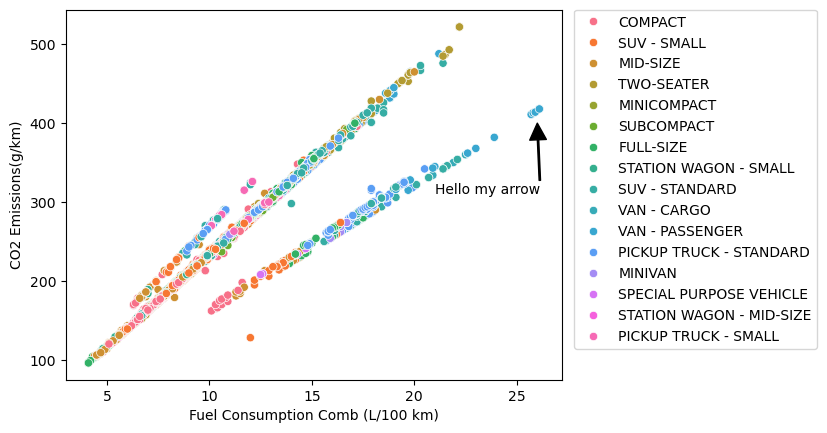

In [27]:
# 절대좌표
# annotate()로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    data=df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Vehicle Class',
    ax=ax
)

ax.legend(bbox_to_anchor=(1.01, 1.05)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

ax.annotate(
    xy=(26,400), # 화살표의 절대좌표
    text='Hello my arrow',
    xytext=(21,310),
    arrowprops={'color': 'black', 'width': 1}
)
ax.legend(bbox_to_anchor=(1.01, 1.02))

# xytext : 텍스트의 좌표
# arrowprops 화살표

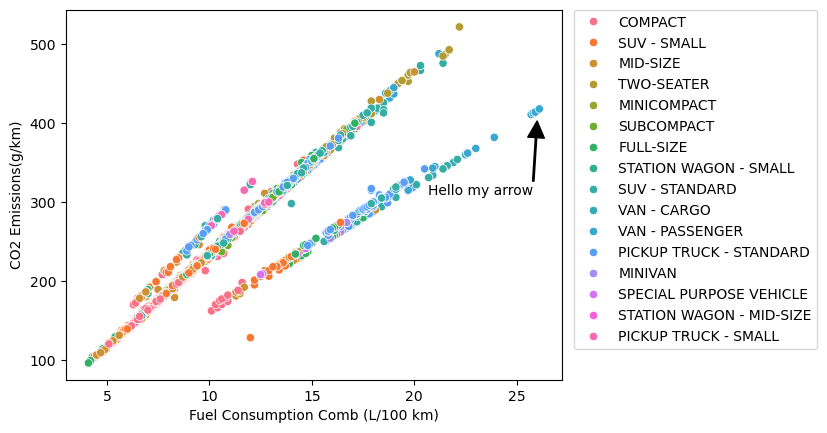

In [28]:
# 상대좌표
# annotate()로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    data=df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Vehicle Class',
    ax=ax
)

ax.legend(bbox_to_anchor=(1.01, 1.05)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

ax.annotate(
    xy=(0.95,0.7), # 상대좌표로 하면 이것도 바꿔줘야된다.
    text='Hello my arrow',
    xytext=(0.73,0.5),
    arrowprops={'color': 'black', 'width': 1},
    xycoords=ax.transAxes # 상대좌표
)
ax.legend(bbox_to_anchor=(1.01, 1.02))

# xytext : 텍스트의 좌표
# arrowprops 화살표

In [29]:
# 절대 좌표
# plotly scatter
fig = px.scatter(
    data_frame=df_co2, 
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    color='Fuel Type',  # 이 부분을 추가하면 범례가 생깁니다.
    width=900,
    height=600
)

fig.update_layout(
    legend_x = 1.2, legend_y=1
)

fig.add_annotation(
    x=20, y=130,
    text='<b>fuel type ethanol emits less Co2</b>',
    showarrow=False
)

fig.show() 

In [30]:
# 상대 좌표
# plotly scatter
fig = px.scatter(
    data_frame=df_co2, 
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    color='Fuel Type',  # 이 부분을 추가하면 범례가 생깁니다.
    width=900,
    height=600
)

fig.update_layout(
    legend_x = 1.2, legend_y=1
)

fig.add_annotation(
    #x=20, y=130,
    x=0.9, y=0.75,
    yref='y domain', xref='x domain',
    text='<b>fuel type ethanol emits less Co2</b>',
    showarrow=True, arrowhead=2
)

fig.show() 

# 조건을 이용한 강조하기

In [31]:
df_ins = pd.read_csv(
    './data/product_inspection.csv'
)
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             429 non-null    object 
 1   inspection_step  429 non-null    object 
 2   value            429 non-null    float64
 3   upper_spec       429 non-null    float64
 4   target           429 non-null    float64
 5   lower_spec       429 non-null    float64
dtypes: float64(4), object(2)
memory usage: 20.2+ KB


In [32]:
df_ins['date'] = pd.to_datetime(df_ins['date'])
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             429 non-null    datetime64[ns]
 1   inspection_step  429 non-null    object        
 2   value            429 non-null    float64       
 3   upper_spec       429 non-null    float64       
 4   target           429 non-null    float64       
 5   lower_spec       429 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 20.2+ KB


In [33]:
df_ins.head()

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6


In [34]:
df_ins_A = df_ins.query("inspection_step == 'A'") # 검사 공정 == A
df_ins_A

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6
...,...,...,...,...,...,...
138,2022-05-19,A,21.7,22.0,21.3,20.6
139,2022-05-20,A,21.6,22.0,21.3,20.6
140,2022-05-21,A,21.6,22.0,21.3,20.6
141,2022-05-22,A,21.4,22.0,21.3,20.6


<Axes: xlabel='date', ylabel='value'>

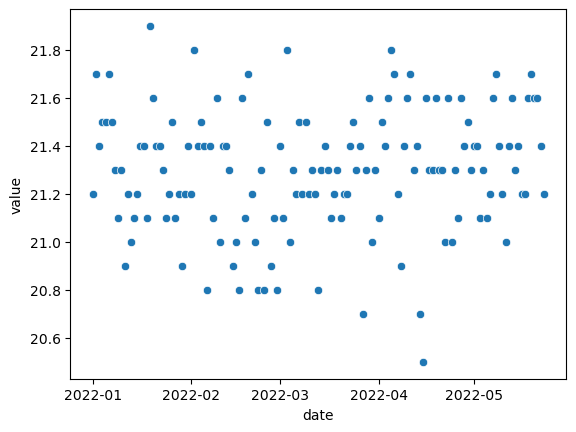

In [35]:
fig, ax = plt.subplots()
sns.scatterplot(x='date', y='value', data= df_ins_A, ax=ax)

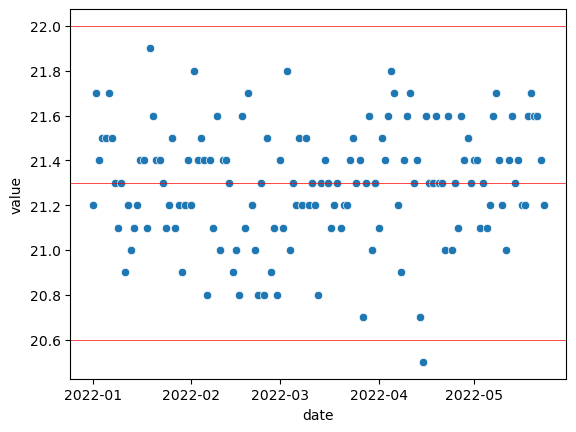

In [36]:
# 수평선 그리기
fig, ax = plt.subplots()
sns.scatterplot(x='date', y='value', data= df_ins_A, ax=ax)
ax.axhline(df_ins_A['lower_spec'].iloc[-1], color='red', linewidth=0.5)
ax.axhline(df_ins_A['target'].iloc[-1], color='red', linewidth=0.5)
ax.axhline(df_ins_A['upper_spec'].iloc[-1], color='red', linewidth=0.5)

In [37]:
#plotly
fig = px.scatter(df_ins_A, x='date', y='value', width=500, height=400)

fig.add_hline(df_ins_A['lower_spec'].iloc[-1], line_color='red', line_width=0.5)
fig.add_hline(df_ins_A['target'].iloc[-1], line_color='red', line_width=0.5)
fig.add_hline(df_ins_A['upper_spec'].iloc[-1], line_color='red', line_width=0.5)

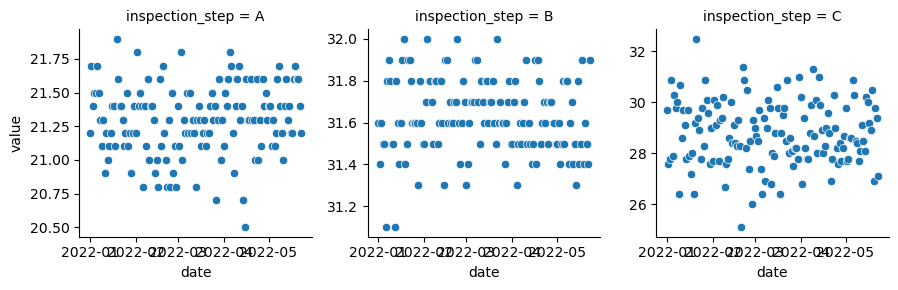

In [38]:
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step') # 검사공정 값 A,B,C 각각 차트 구분
g.map_dataframe(sns.scatterplot, x='date', y='value')

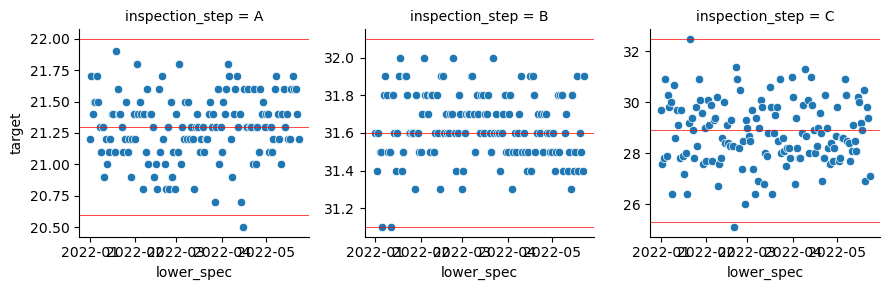

In [ ]:
# facegrid.map()
def custom(lower_spec, target,upper_spec, **kws):
    ax = plt.gca()
    # 수평선 그리기
    ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(target.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(upper_spec.iloc[-1], color='red', linewidth=0.5)

g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step') # 검사공정 값 A,B,C 각각 차트 구분
g.map_dataframe(sns.scatterplot, x='date', y='value')
g.map(custom, 'lower_spec', 'target','upper_spec')

In [40]:
# Plotly에서의 활용
df = pd.read_csv('./data/product_inspection.csv')
df['date'] = pd.to_datetime(df['date'])

fig = px.scatter(df, x='date', y='value', facet_col='inspection_step')
print(fig.layout.annotations)

# For 문을 이용한 plotly에서의 facet mapping
fig = px.scatter(df, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df['inspection_step'].nunique()):
    step = fig.layout.annotations[idx].text.split('=')[1]
    fig.add_hline(
        y=df.query('inspection_step == @step')['lower_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df.query('inspection_step == @step')['upper_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df.query('inspection_step == @step')['target'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    
fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

(layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=A',
    'x': 0.15999999999999998,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=B',
    'x': 0.49999999999999994,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=C',
    'x': 0.8399999999999999,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}))


In [41]:
# 특정 조건에 해당하는 값 찾기
# 각 공정별로 관리 스펙에서 벗어난 자재가 있는 그래프 테두리 강조
df_ins['spec_out'] = (df_ins['value'] > df_ins['upper_spec']) | (df_ins['value'] < df_ins['lower_spec'])
df_ins.head()

,date,inspection_step,value,upper_spec,target,lower_spec,spec_out
0,2022-01-01,A,21.2,22.0,21.3,20.6,False
1,2022-01-02,A,21.7,22.0,21.3,20.6,False
2,2022-01-03,A,21.4,22.0,21.3,20.6,False
3,2022-01-04,A,21.5,22.0,21.3,20.6,False
4,2022-01-05,A,21.5,22.0,21.3,20.6,False


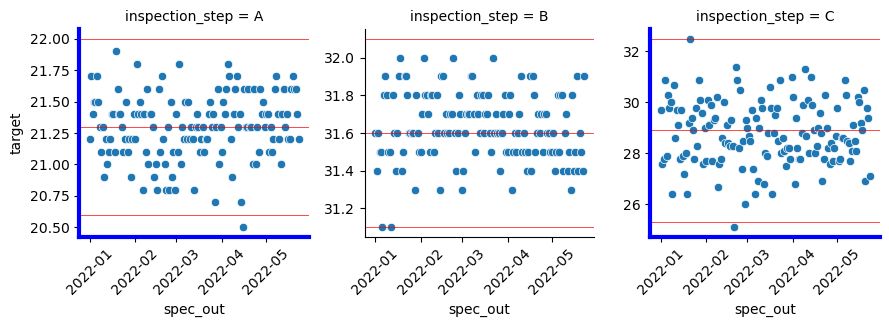

In [42]:
# facegrid.map() 함수를 위한 커스텀 함수 정의
def custom(lower_spec, target,upper_spec, **kws):
    ax = plt.gca()
    # 수평선 그리기
    ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(target.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(upper_spec.iloc[-1], color='red', linewidth=0.5)

def if_spec_out(spec_out, **kws):
    if spec_out.sum() > 0:
        ax=plt.gca()
        spines = ['left', 'bottom']
        for spin in spines:
            ax.spines[spin].set_color('blue')
            ax.spines[spin].set_linewidth(3)


g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step') # 검사공정 값 A,B,C 각각 차트 구분
g.map_dataframe(sns.scatterplot, x='date', y='value')
g.map(custom, 'lower_spec', 'target','upper_spec')
g.map(if_spec_out, 'spec_out')

# x축 tick 라벨 회전
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)   # 45도 회전 (원하는 각도로 변경 가능)

# 기하급수적으로 커지는 y축 값을 변환해서 표현

In [43]:
df_covid = pd.read_csv(
    './data/Covid19-India.csv'
)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28568 entries, 0 to 28567
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       28568 non-null  object
 1   region     28568 non-null  object
 2   confirmed  28568 non-null  int64 
 3   active     28568 non-null  int64 
 4   cured      28568 non-null  int64 
 5   deaths     28568 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [44]:
df_covid.head()

,date,region,confirmed,active,cured,deaths
0,2020-03-27,Andaman and Nicobar Islands,1,1,0,0
1,2020-03-28,Andaman and Nicobar Islands,6,6,0,0
2,2020-03-29,Andaman and Nicobar Islands,9,9,0,0
3,2020-03-30,Andaman and Nicobar Islands,9,9,0,0
4,2020-03-31,Andaman and Nicobar Islands,10,10,0,0


<Axes: xlabel='date', ylabel='confirmed'>

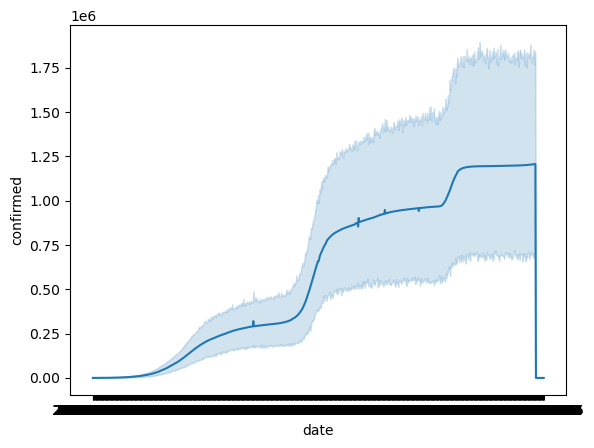

In [45]:
# lineplot
# 지역이 너무 많다
fig, ax = plt.subplots()
sns.lineplot(data=df_covid, x='date', y='confirmed', ax=ax)

In [46]:
df_covid_Mah = df_covid.loc[df_covid.region == 'Maharashtra']
df_covid_Mah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 15857 to 16666
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       810 non-null    object
 1   region     810 non-null    object
 2   confirmed  810 non-null    int64 
 3   active     810 non-null    int64 
 4   cured      810 non-null    int64 
 5   deaths     810 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 44.3+ KB


In [47]:
df_covid_Mah.tail(5)

,date,region,confirmed,active,cured,deaths
16662,2022-06-26,Maharashtra,7956173,24333,7783940,147900
16663,2022-06-27,Maharashtra,7962666,24608,7790153,147905
16664,2022-06-28,Maharashtra,7965035,25570,7791555,147910
16665,2022-06-29,Maharashtra,7968517,25481,7795121,147915
16666,2022-06-30,Maharashtra,7972474,25735,7798817,147922


<Axes: xlabel='date', ylabel='confirmed'>

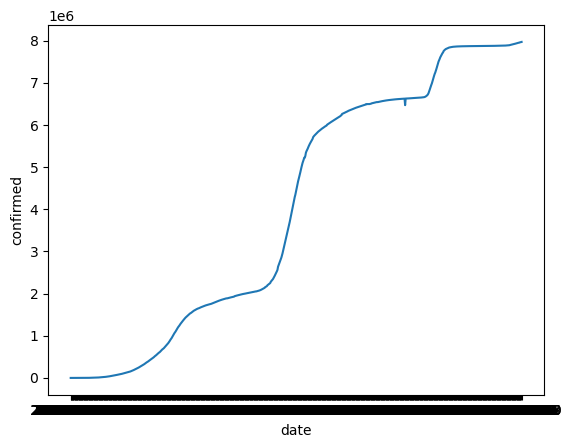

In [48]:
# lineplot
# y값이 너무 많다
fig, ax = plt.subplots()
sns.lineplot(data=df_covid_Mah, x='date', y='confirmed', ax=ax)

y값을 로그 스케일 10의 1제곱, 2제곱, 3제곱... 로그 형식으로 변환해서 그린다.

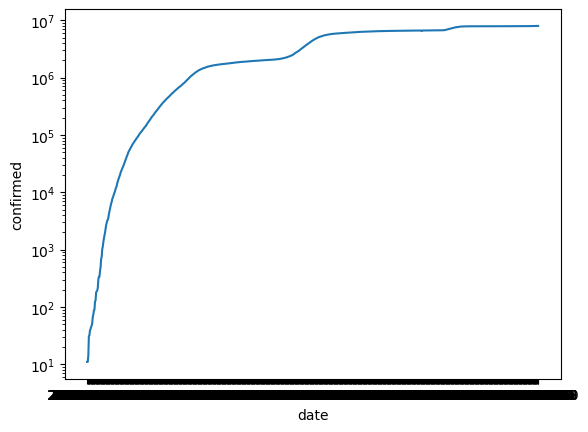

In [49]:
fig, ax = plt.subplots()
sns.lineplot(data=df_covid_Mah, x='date', y='confirmed', ax=ax)
ax.set_yscale('log')

In [50]:
# plotly 에서 로그 스케일
fig = px.line(
    df_covid_Mah, x='date', y='confirmed', width=500, height=400, log_y=True
)
fig.show()

In [51]:
# seaborn color palette, plotly color


# 색상 선택하기

<Axes: xlabel='total_bill', ylabel='tip'>

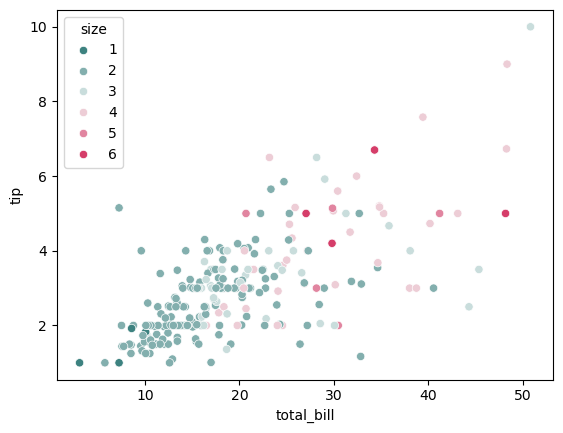

In [52]:
df_tips = sns.load_dataset('tips')

# color = sns.color_palette('light:#006d2c', as_cmap=True)
# color = sns.color_palette('coolwarm', as_cmap=True)
color = sns.diverging_palette(550,0, as_cmap=True)


fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df_tips, ax=ax,
    hue='size', palette=color
)

# plotly 색상 팔레트
- 범주형 : px.colors.qualitative   
- 연속형 : px.colors.sequential    
- 양극형 : px.colors.diverging    
- 주기적 데이터 : px.colors.cyclical

In [53]:
fig = px.colors.qualitative.swatches()
fig

In [54]:
fig = px.colors.sequential.swatches_continuous()
fig.show()

In [55]:
fig = px.colors.diverging.swatches_continuous()
fig.show()

In [56]:
fig = px.colors.cyclical.swatches_cyclical()
fig

In [57]:
px.scatter(
    df_tips, x='total_bill', y='tip', width=500, height=400,
    color='size', color_continuous_scale='Viridis'
)